In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df=pd.read_csv("customer_data.csv")
print(df.head())
print(df.describe())
print(df.info())

                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  
                Age  Annual Income  Spending Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000       51.000000
75%       72.000000  155008.000000       75.000000
max       90.000000  199974.000000      100.0

In [11]:

features = ['Age', 'Annual Income', 'Spending Score']
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


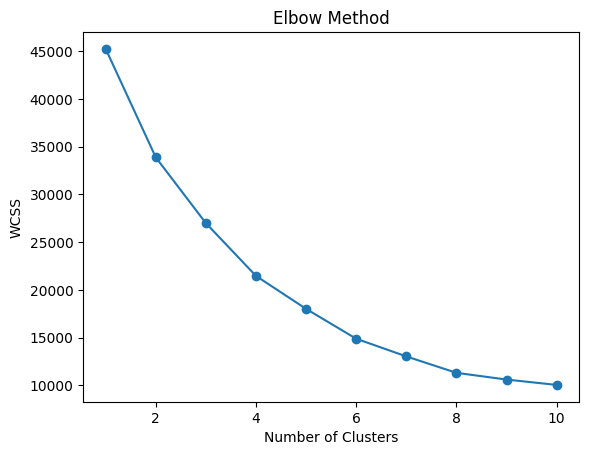

In [12]:



wcss = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [13]:

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


print(df['Cluster'].value_counts())


Cluster
0    5667
1    4810
2    4602
Name: count, dtype: int64


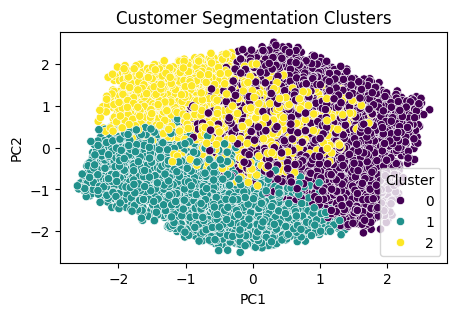

In [14]:
from sklearn.decomposition import PCA
import seaborn as sns


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']


plt.figure(figsize=(5, 3))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title("Customer Segmentation Clusters")
plt.show()


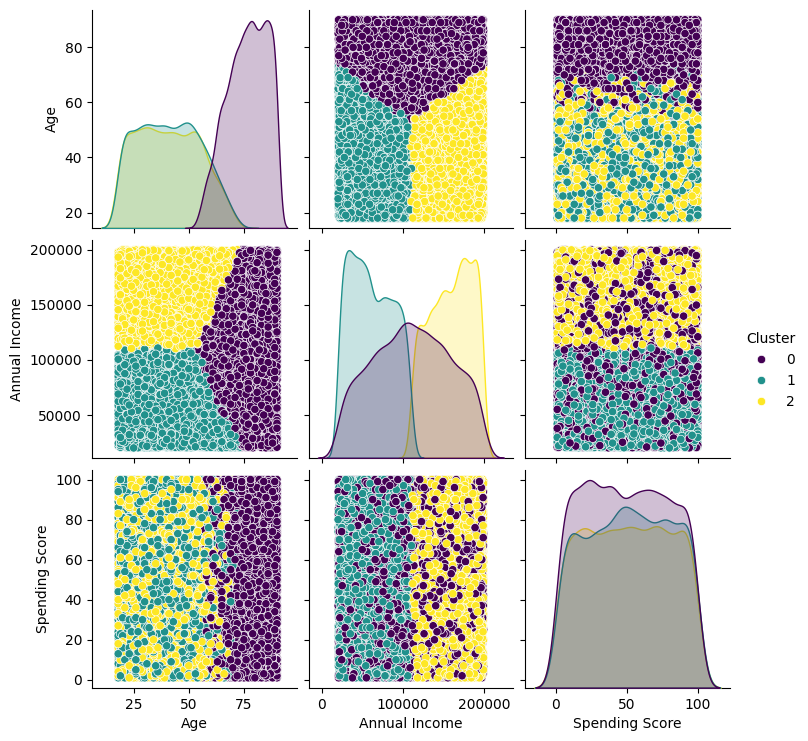

<Figure size 5x3 with 0 Axes>

In [18]:
sns.pairplot(df, hue="Cluster", diag_kind="kde", palette="viridis")

plt.figure(figsize=(0.05, 0.03))
plt.show()

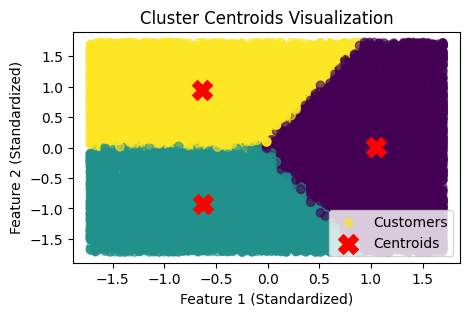